## S.O.C

Lagrange's Theorem and the Kuhn-Tucker Theorem give us first order necessary conditions for constrained maximization problems. The conditions are not in general sufficient to determine the optimum.


The maxima and minima can be distinguished by examining the **curvatures** of the objective and constraint functions.

### The problem:

choosing the vector x to maximize the $F(x)$ subject to a scalar constaint $G(x) <= c$. Let $x$ denote the optimum choice, and now write $\bar v$ for the maximum value.

### Convex Set

A set $ V \subset \mathbb{R}^n $ is called convex if the line segment between any two points in \( V \) is contained in the set itself, i.e. if $ \alpha x + (1-\alpha)y \in V \text{ for all }\alpha \in [0,1], x,y \in V $


ref:
https://lagunita.stanford.edu/courses/Engineering/CVX101/Winter2014/courseware/cf069c5b8fed4f1b89b3e10064b707e1/f7f852967e6c484badaaf59bed671374/
---




# separation


The common tangent separates the $x$-plane into two halves, each containing one of the sets.

This separation is the crucial property that allows us to distinguish maximum from minima, and obtain sufficient conditions for the maximization problem.





![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Separating_axis_theorem2008.png/440px-Separating_axis_theorem2008.png)


#### Hyperplane separation theorem[1] 

— Let A and B be two disjoint nonempty convex subsets of Rn. Then there exist a nonzero vector $p$ and a real number $b$ such that

$${\displaystyle \langle x,p\rangle \geq b\,{\text{ and }}\langle y,p\rangle \leq b} $$
for all $x$ in$ A$ and $y$ in $B$; i.e., the hyperplane ${\displaystyle \langle \cdot ,p\rangle =b} $, $p$ the normal vector, separates $A$ and $B$.

## Convext Sets

### Definition

A set S of n-vectors is convex if

(1−λ)x + λx' ∈ S whenever x ∈ S, x' ∈ S, and λ ∈ [0,1].

(1 − λ)x + λx' a convex combination of x and x'.


### Proposition

The intersection of convex sets is convex.

## Concave and convex functions

Let f be a function of many variables, defined on a convex set S. We say that f is concave if the line segment joining any two points on the graph of f is never above the graph; f is convex if the line segment joining any two points on the graph is never below the graph. (That is, the definitions are the same as the definitions for functions of a single variable.)


### Definition

Let f be a function of many variables defined on the convex set S. Then f is

concave on the set S if for all x ∈ S, all x' ∈ S, and all λ ∈ (0,1) we have

$$f((1−λ)x + λx')	 ≥ 	(1−λ)f(x) + λf(x')$$

convex on the set S if for all x ∈ S, all x' ∈ S, and all λ ∈ (0,1) we have

$$f((1−λ)x + λx')	 ≤ 	(1−λ)f(x) + λf(x').$$


ref:

https://mjo.osborne.economics.utoronto.ca/index.php/tutorial/index/1/cvn/t

In [8]:

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import sympy as sym
sym.init_printing()
x1,x2,alpha,lam = sym.symbols('x_1 x_2 alpha lambda ', positive = True)


In [3]:
from sympy import series
x, xbar = sym.symbols("x,xbar")
f = sym.Function("f")
g = sym.Function("g")
sym.series(f(x), x, x0=xbar, n=3)

                                                ⎛  2        ⎞│                
                                              2 ⎜ d         ⎟│                
                                      (x - x̅) ⋅⎜────(f(ξ₁))⎟│                
                                                ⎜   2       ⎟│                
                 ⎛ d        ⎞│                  ⎝dξ₁        ⎠│ξ₁=x̅    ⎛      
f(x̅) + (x - x̅)⋅⎜───(f(ξ₁))⎟│      + ───────────────────────────── + O⎝(x - x
                 ⎝dξ₁       ⎠│ξ₁=x̅                 2                         

            
            
            
            
  3        ⎞
̅) ; x → x̅⎠
            

In [4]:
f = x1*x2
f

In [6]:
g = x1**2 + 2*x2**2
g

In [9]:
L = 2*f + lam*(9-g)

In [10]:
L1 =sym.diff(L, x1)
L1

In [11]:
L2=sym.diff(L, x2)
L2

In [12]:
Llam =sym.diff(L, lam)
Llam

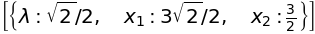

In [17]:
sol1=sym.solve([L1,L2,Llam], x1,x2, lam,dict=True)
sol1

In [14]:
x = sym.Matrix([x1,x2])
x

⎡x₁⎤
⎢  ⎥
⎣x₂⎦

In [15]:
pf =sym.Matrix([f]).jacobian(x).T
pf

⎡x₂⎤
⎢  ⎥
⎣x₁⎦

In [25]:
pf = pf.subs(sol1[0])
pf

⎡3/2 ⎤
⎢    ⎥
⎢3⋅√2⎥
⎢────⎥
⎣ 2  ⎦

In [26]:
xbar = x.subs(sol1[0])
xbar

⎡3⋅√2⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎣3/2 ⎦

In [31]:
bf = pf.T*xbar
bf

⎡9⋅√2⎤
⎢────⎥
⎣ 2  ⎦

In [32]:
bf.evalf()

[6.36396103067893]

In [34]:
vbar = f.subs(sol1[0])
vbar

In [40]:
vbar/bf

             -1
     ⎛⎡9⋅√2⎤⎞  
9⋅√2⋅⎜⎢────⎥⎟  
     ⎝⎣ 2  ⎦⎠  
───────────────
       4       

In [45]:
(vbar.evalf()/bf.evalf())

                                     -1
3.18198051533946⋅([6.36396103067893])  

In [42]:
p = 1/2*pf.T
p

[0.75  0.75⋅√2]

### Convex sets > Affine and convex sets 

### convex cone

Stephen Boyd's textbook on convex optimization. It says "A set $C$ is called a cone or nonnegative homogeneous, if for every $x ∈ C$, we have $θx∈C$. A set $C$ is a convex cone if it is convex and a cone."

#### a cone but not convex.

-  the graph of $y=|x|$ is a cone that is not convex; however, the locus of points $(x,y)$ with $y≥|x|$ is a convex cone.

- The union of the 1st and the 3rd quadrants is a cone but not convex; the 1st quadrant itself is a convex cone.


#### Convex sets 

Any subspace is affine, and a convex cone(hence convex).

- a linear subspace contains all multiples of its elements as well as all linear combinations (in particular convex ones). Hence it is a convex cone.

- A cone is closed under positive scalar multiplication; a linear sunspace is closed under all real scalar multiplication, positive, negative, or zero.


#### Properties

$$S = \{  x \in \mathbf{R}^2 \mid  x \in [0,1]^2\}$$


$$D = \{  x \in \mathbf{R}^2 \mid  \| x\| _2 \leq 1\}$$

both are convex set

then

$$S \cap D$$


$$S \cup D$$

are convex as well



ref:

http://systemsbiology.ucsd.edu/sites/default/files/Attachments/Images/classes/convex_presentations/convexity.pdf




### what does scaling the normal vector of a plane (/hyperplane) mean?


 scaling (multiplying or dividing by a constant) the normal vector of a plane, does not affect the plane itself.
 
 minimizing the normal vectors, allows you to compare planes just by their normal vectors. If they are the same, so are the two planes. This would not be as trivial if the two normal vectors are scaled differently. There are probably other useful features of having consistent rules for expressing normal vectors which I am not aware of.

Also note that, in terms of the plane, nothing is changing by scaling the normal vector since only the angle (or relative lengths of the components) matters to define a plane. Scaling is simply stretching the normal vector along it's axis.

![](https://i.stack.imgur.com/vMOEp.gif)
 

ref:
https://mjo.osborne.economics.utoronto.ca/index.php/tutorial/index/1/qcc/t

https://stats.stackexchange.com/questions/267267/what-does-scaling-the-normal-vector-of-a-plane-hyperplane-mean

http://web.hku.hk/~pingyu/6066/LN/LN3_Convex%20Sets%20and%20Concave%20Functions_ver2.pdf

In [8]:
# X, Y value
X = np.arange(0, 4, 0.25)
Y = np.arange(0, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y meshgrid
R =X **0.33* Y ** 0.67
# height value
Z = R

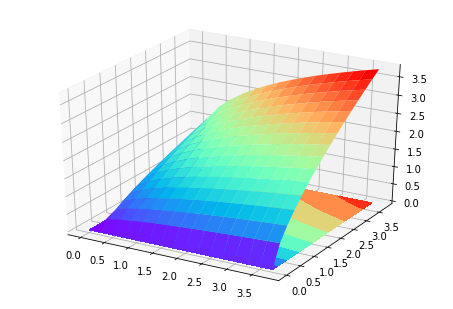

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
# rstride and cstride represent the scale of row and column of grid
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.get_cmap('rainbow'))


In [10]:
# X, Y value
X = np.arange(0, 4, 0.25)
Y = np.arange(0, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y meshgrid

# height value
Z = X **2+ Y ** 2

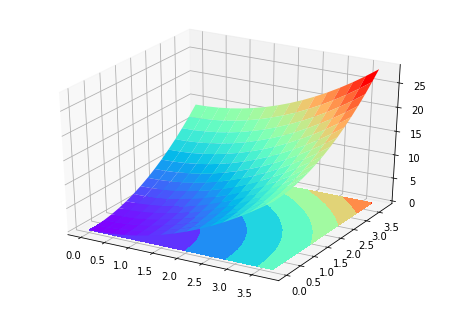

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
# rstride and cstride represent the scale of row and column of grid

ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.get_cmap('rainbow'))

# level curve



In [29]:
import sympy as sym

sym.init_printing()

In [33]:
x,y,z = sym.symbols('x y z')
a,b,c = sym.symbols('a b c')
F, G, H = sym.symbols('f g h', cls=sym.Function)
x1,x2,lam = sym.symbols('x1 x2 lambda', postive = True )

In [34]:
F = x1*x2
F

In [35]:
G = x1**2 + x2**2
#G = x1**2 + 2*x2**2
G

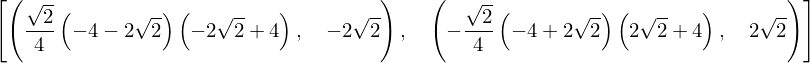

In [36]:
sym.solve([F-8, 16-G], x1,x2)

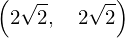

In [37]:
sym.simplify(sym.solve([F-8, 16-G], x1,x2)[1])

In [38]:
c = 16

In [39]:
L = F + lam*(c-G)
L

In [40]:
L1 =sym.diff(L, x1)
L1

In [41]:
L2=sym.diff(L, x2)
L2

In [42]:
Llam =sym.diff(L, lam)
Llam

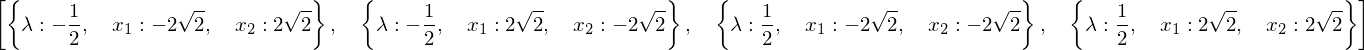

In [43]:
sol1=sym.solve([L1,L2,Llam], [x1,x2, lam], dict=True)
sol1

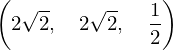

In [44]:
sol1[3][x1],sol1[3][x2],sol1[3][lam]

In [45]:
#La.subs({x1:sol1[1][1]})

In [46]:
F.diff(x1).subs(sol1[3])

In [47]:
F.diff(x2).subs(sol1[3])

In [48]:
F.subs(sol1[3])

ref:
    
https://www.math.uri.edu/~dobrush/mth243/matlab/ch15.html    